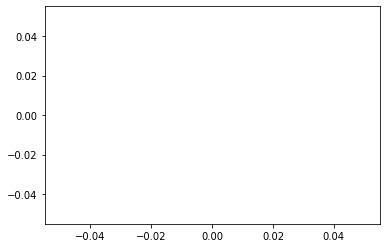

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.display import display, Markdown, Latex
import pickle

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.plot()

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)


from utils import FoodStamps, get_random_prob

In [2]:
prob = FoodStamps()

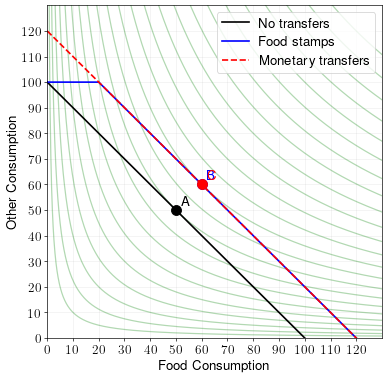

True

In [3]:
prob.graph_with_IC(show=True, base=True, tfr=True, inkind=True)

In [4]:
df = pd.read_csv("CobbDouglasConsumer_examples.csv")
df = df.loc[ df['py']==1 ].reset_index(drop=True)
examples = []
n_found = 0

for idx, row in df.iterrows():
    gmax, ymax = row['gmax'], row['ymax']
    for val in np.arange(gmax/12, gmax-ymax+gmax/12, gmax/12):
        params = dict(row).copy()
        params['val'] = val
        prob = FoodStamps(params)
        if prob.check_solution():
            n_found+=1
            examples.append( prob.params | prob.sol )
            if (n_found%1000==0):
                print(f"{n_found} examples found...")
examples = pd.DataFrame.from_dict(examples)
examples = examples.drop_duplicates()
examples.to_csv("FoodStamps_examples.csv", index=False, header=True)
print(f"{len(examples)} examples found.")

210 examples found.


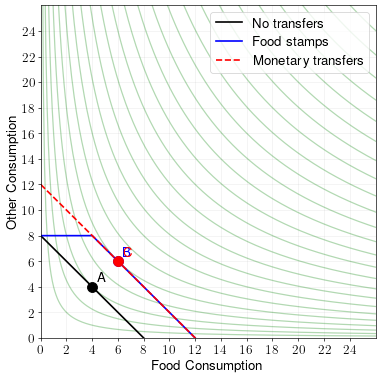

True

In [5]:
prob = get_random_prob(FoodStamps, "FoodStamps_examples.csv")
prob.graph_with_IC(show=True, base=True, inkind=True, tfr=True)